# Início

Temos em mãos um conjunto de dados de anúncios da WebMotors, o qual começaremos chamando de `df`. De início, vamos fazer uma limpeza dos dados, para depois analisar a relação entre a quantidade de `leads` e os demais dados, para depois propor estratégias para maximizar o número de `leads`.


Começamos importando bibliotecas relevantes para o caso, e usando `sns.set()` para estilizar os gráficos que virão a seguir.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

from graphics.plot import dataplot

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, auc




sns.set()

## Funções a serem usadas

Para ajudar a visualizar os dados, criamos a função `dataplot`, que recebe os seguinte parâmetros:

- `colunax`: Coluna que define o eixo  das abscissas do gráfico;
- `colunay`: Eixo das ordenadas;
- `add`: figura adicional a ser plotada, para fins de comparação ou referência.
- `linestyle1`: linestyle dos dados;
- `linestyle2`: linestyle da figura adicional.

In [2]:
# def dataplot(dados,
#              colunax,
#              colunay,
#              add=[],
#              linestyle1 = 'none',
#              linestyle2 = 'none'):

#   df = dados.sort_values(colunax)

#   #plota o gráfico
#   fig = plt.figure(figsize=(9,9))

#   if add != []:
#     plt.plot(add[0], add[1], marker ='.', linestyle=linestyle2)

#   plt.plot(df[colunax], df[colunay], marker ='.', linestyle=linestyle1)
#   plt.xlabel(colunax)
#   plt.ylabel(colunay)
#   plt.grid(b=True, which='both')
#   plt.show()


Se um dataframe possui muitas colunas, não conseguimos exibir todas de uma só vez para observação.

Com isso em mente, aqui definimos a função `df_show()` que recebe um dataframe, e a cada vez que é executada, retorna colunas diferentes do mesmo dataframe. Seu intuíto é exibir colunas diferentes do dataframe seguindo ciclos.

In [3]:
variavel_estatica=1

def df_show(df):
  global variavel_estatica
  variavel_estatica += 10
  a = variavel_estatica

  if variavel_estatica >= len(df.T):
    variavel_estatica = 1
    a = len(df.T)

  return df.iloc[:, a-11:a]


# Limpeza dos dados
## Os Dados e Amostra:

Chamamos de `df` os dados de anúncio, e de `dicio` o dicionário de nomes da tabela para consultas.

Podemos ainda definir uma amostra aleatória (ou não) em `amostra` para observação, e usar a função `df_show()`, definida acima, para passar pelas diversas colunas da amostra.

In [4]:
dicio = pd.read_csv('dados/dicio.csv')
df    = pd.read_csv('dados/dados.csv')

amostra = df.sample(6)

In [5]:
#rode esta célula algumas vezes para ver as demais colunas de amostra
df_show(amostra)

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo
45495,34876,11118,2,3,12,48,5,16,1194,345351,2014
18196,100904,7300,2,3,1,204,5,4,740,343824,2014
29794,150531,6388,2,3,8,484,16,8,3297,347520,2018
10620,144449,8619,2,3,1,424,1,3,687,346703,2013
2290,9575,3669,2,3,16,8,5,10,3336,344514,2015
16081,111994,6732,2,3,1,244,5,2,1143,343629,2015


o Dicionário:

In [6]:
dicio

,attribute,description
0,cod_anuncio,código do anúncio
1,cod_cliente,código do anunciante
2,cod_tipo_pessoa,"tipo de anunciante: PF=1, PJ=2"
3,prioridade,"prioridade do anúncio (1=alta, 2-média, 3-baixa)"
4,leads,tota de propostas recebidas
5,views,quantidade de visualizações no anúncio
6,cliques_telefone,quantidade de cliques no telefone anunciado
7,cod_marca_veiculo,código da marca do veículo
8,cod_modelo_veiculo,código do modelo veículo
9,cod_versao_veiculo,código da versão do veículo


Abaixo, podemos checar todos os valores distintos para uma coluna que queiramos investigar

In [7]:
df['uf_cidade'].unique()

array(['GO_Itumbiara', 'SP_Osasco', 'SP_SÃ£o Paulo', 'RS_Porto Alegre',
       'SP_SÃ£o JosÃ© dos Campos', 'SP_Santo AndrÃ©', 'SP_JundiaÃ\xad',
       'SP_IperÃ³', 'SP_RibeirÃ£o Preto', 'SP_Leme', 'SP_GuarujÃ¡',
       'MG_Uberaba', 'SP_PoÃ¡', 'DF_BrasÃ\xadlia',
       'SP_SÃ£o Bernardo do Campo', 'RJ_Volta Redonda',
       'RJ_Rio de Janeiro', 'MG_Belo Horizonte', 'GO_Caldas Novas',
       'SP_Santana de ParnaÃ\xadba', 'SP_Guarulhos', 'SP_Campinas',
       'SP_SÃ£o Caetano do Sul', 'SP_Piedade', 'RJ_Miguel Pereira',
       'PI_Teresina', 'MG_DivinÃ³polis', 'PA_SantarÃ©m', 'PR_Curitiba',
       'SC_Major Vieira', 'RS_Rio Grande', 'RS_ViamÃ£o', 'SP_Santos',
       'MG_Barbacena', 'PR_Umuarama', 'SP_TaubatÃ©', 'RN_Natal',
       'ES_VitÃ³ria', 'SC_CaÃ§ador', 'SC_ChapecÃ³',
       'SP_SÃ£o JosÃ© do Rio Preto', 'SP_Barretos', 'SP_Atibaia',
       'RJ_PetrÃ³polis', 'SP_AraÃ§atuba', 'RS_SÃ£o Leopoldo', 'PE_Recife',
       'RS_Novo Hamburgo', 'SP_Dracena', 'SP_PaulÃ\xadnia', 'SP_CubatÃ£o',
  

Algumas colunas estão com caracteres que podem dificultar a análise, então alteramos seus nomes para facilitar seu uso durante o resto da análise.

Temos diversos munícipios diferentes, muitos com caracteres indesejados em seus nomes. Iremos considerar apenas a União Federativa de cada anúncio. Isso não só facilita a análise, mas elimina problemas decorrentes da formatação do nome da cidade e também resulta em um conjunto de dados menos fragmentado. Daí, também trocamos o nome da coluna `'uf_cidade'` .

In [8]:
dicio.rename(columns={' description':'description'}, inplace=True)
df.rename(columns={'cliques_telefone*':'cliques_telefone', 'uf_cidade':'uf'}, inplace=True)

df.loc[:,'uf'] = df['uf'].apply(lambda x: x[:2])

In [9]:
df['uf'].unique()

array(['GO', 'SP', 'RS', 'MG', 'DF', 'RJ', 'PI', 'PA', 'PR', 'SC', 'RN',
       'ES', 'PE', 'BA', 'MT', 'MA', 'CE', 'MS', 'PB', 'AL', 'SE', 'AC',
       'RO', 'AM', 'RR', 'TO', 'AP', 'N/'], dtype=object)

Ainda restaram campos com dados indesejáveis em nossa nova coluna `'uf'`. Abaixo, alteramos esses dados para facilitar seu tratamento:

In [10]:
# tratamento da coluna: 
df.loc[:,'uf'] = df['uf'].apply(lambda x: np.nan if (x == 'N/') else x)

# valores presentes na coluna após o tratamento: 
df['uf'].unique()

array(['GO', 'SP', 'RS', 'MG', 'DF', 'RJ', 'PI', 'PA', 'PR', 'SC', 'RN',
       'ES', 'PE', 'BA', 'MT', 'MA', 'CE', 'MS', 'PB', 'AL', 'SE', 'AC',
       'RO', 'AM', 'RR', 'TO', 'AP', nan], dtype=object)

As colunas `cod_anuncio` e `cod_cliente` não são relevantes para esta análise, e portanto as descartamos.

Vemos que as colunas de `alarme` até `sensorestacion`  possuem dados qualitativos (`'S'` e `'N'`) que podemos substituir por `0` e `1` para melhor processá-los depois.




In [11]:
# descartamos dados irrelevantes: 
df.drop('cod_cliente', inplace=True, axis=1)
df.drop('cod_anuncio', inplace=True, axis=1)

# atribuímos 1 para presença, 0 para ausência, e np.nan para dados inválidos:
for i in range(27, len(df.T)):
  df.iloc[:, i] = df.iloc[:, i].apply(lambda x: 1 if (x == 'S') else (0 if x == 'N' else np.nan))

## Dados Nulos
Aqui buscamos por dados nulos para poder tratá-los. Nesta análise, por questão de tempo, optaremos por remover a maioria dos dados nulos, mas sabendo que é possível, em uma análise mais profunda, inferir ou estimar muitas informações ausentes e/ou inconsistentes.

Exibimos abaixo uma relação dos dados nulos:

In [12]:
(df
 .isnull()
 .sum()
 [df.isnull().sum() > 0])

uf                                      4
vlr_mercado                          6217
flg_ipva_pago                         312
flg_todas_revisoes_concessionaria     312
flg_garantia_fabrica                  312
flg_adaptado_pcd                      312
combustivel                             1
cambio                                  1
portas                                  1
alarme                                  1
airbag                                  8
arquente                                1
bancocouro                              1
arcondic                                1
abs                                     1
desembtras                              1
travaeletr                              1
vidroseletr                             1
rodasliga                               1
sensorchuva                             1
sensorestacion                          1
dtype: int64

Olhando para a linha que possui dado nulo na coluna `'abs'`, percebemos que se trata de um anúncio que falta diversas informações, e por isso o descartamos. Se rodarmos a célula acima após rodar a célula abaixo, perceberemos que isso elimina a presença de dados nulos em boa parte das colunas.  

In [13]:
df_show(df[df['abs'].isnull()])

,uf,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica
0,GO,110990.0,7,0,NaN,0,0,0.0,0.0,0,0.0


In [14]:
df = df[df['abs'].isnull() == False]

O valor de mercado de um veículo é muito importante para esta análise e modelagem. Por simplicidade, aqui descartaremos anúncios cujo valor de mercado está ausente. Mas este poderia muito bem ser inferido a partir dos demais anúncios (por exemplo pesquisando nos dados por veículos de mesma marca, ano e modelo, e verificando se o valor de mercado está presente), ou por alguma pesquisa externa.

Removemos também as demais linhas com dados nulos, pois representam menos de 1% do total de dados. Esses dados nulos também poderiam ser melhor tratados em uma análise e modelagem mais detalhada, o que levaria mais tempo.

In [15]:
df = df[df['vlr_mercado'].isnull() == False]
df = df[df['flg_ipva_pago'].isnull() == False]
df = df[df['airbag'].isnull() == False]

Descartamos carros cujo valor do anúncio é nulo, e também carros com 0 portas:

In [16]:
df = df[df['vlr_anuncio'] > 0]
df = df[df['portas'] > 0]

Agora, olhamos um resumo dos dados:

In [17]:
# execute esta célula várias vezes para alternar as colunas visualizadas
df_show(df.describe())

,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,portas
count,4.133200e+04,41332.000000,41332.000000,41332.000000,41332.000000,41332.000000,41332.000000,41332.000000,41332.000000,41332.000000,41332.000000
mean,5.225907e+04,0.212305,0.302332,0.402424,0.148481,0.063341,0.068204,0.017638,0.072365,0.000387,3.854810
std,4.062460e+04,0.408945,0.459274,0.490392,0.355580,0.243578,0.252098,0.131632,0.259095,0.019672,0.511836
min,6.292844e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.128647e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,4.047547e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,6.090083e+04,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,1.111216e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


Acima, podemos ver algumas coisas:
- a grande maioria dos veículos não é blindada;
- a grande maioria não é adaptada para PCD;
- a grande maioria possui 4 portas;
- a maioria possui alarme;
- a maioria possui airbag;
- a maioria possui ar quente;
- a maioria não possui banco de couro;
- a maioria possui freio abs...

Dentre outras coisas.


##Outliers e Inconsistências

Aqui, damos início a uma busca por outliers e dados inconsistentes. Em função do tempo, optaremos aqui por apenas descartar a maioria.

### `'vlr_mercado' x 'vlr_anuncio'`

É esperado que um veículo seja anunciado por um valor não muito distante do seu valor de mercado. Certamente o valor do anúncio pode estar abaixo ou acima do valor de mercado, a depender do vendedor e dos motivos da venda, mas é improvável que essa diferença seja muito grande. Com isso em mente, iremos plotar um gráfico `'vlr_mercado' x 'vlr_anuncio'`, esperando que o gráfico não esteja muito longe da reta `y = x`.

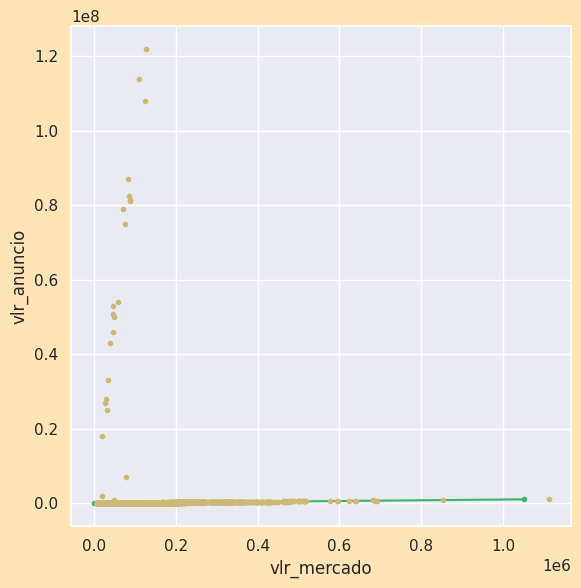

In [18]:
(dataplot(
    df,
    'vlr_mercado',
    'vlr_anuncio',
    add = [
           np.linspace(0, 1052017, 2),
           np.linspace(0, 1052017, 2)    # reta y=x
           ],
    linestyle2='solid'
          )
)

Vemos acima muitos veículos com preço muito elevado. Considerando que R\$ 10.000.000 é um valor muito alto até mesmo para veículos de luxo (embora não seja impossível), descartaremos veículos com valor maior ou igual a este. Em análises posteriores, podemos olhar o modelo, marca, ano e versão dos veículos para estimar ou corrigir seus valores de mercado com cuidado.   

In [19]:
df = df[df['vlr_anuncio'] < 10**7]

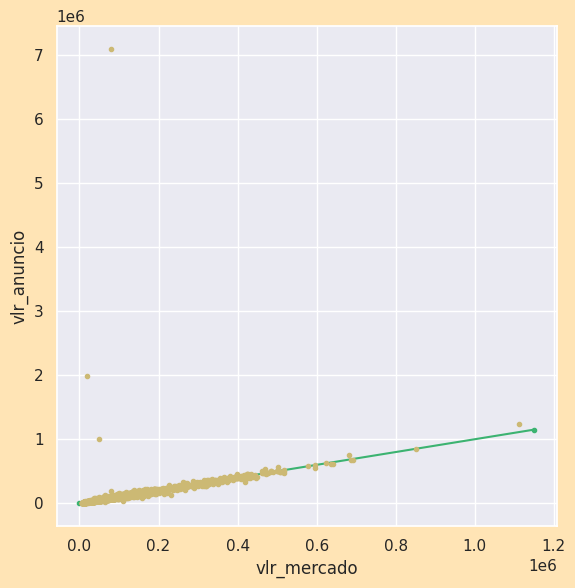

In [20]:
(dataplot(
    df,
    'vlr_mercado',
    'vlr_anuncio',
    add = [
           np.linspace(0, 1150000, 2),
           np.linspace(0, 1150000, 2)    # reta y=x
           ],
    linestyle2='solid'
          )
)

Podemos ver acima que, dos veículos que sobraram cujo preço está acima de R\$ 1.000.000,00, dois deles possuem valor de anúncio muito superior ao valor de mercado.

Abaixo vemos que o veículo na linha `45515` tem R\$ 18.638,86 como valor de mercado e R\$ 1.990.000,00 como valor de anúncio, o que parece absurdo. Entretanto, o valor de anúncio parece mero erro de digitação, pois se o carro custasse apenas R\$ 19.990,00, seu preço estaria condizente com valor de mercado e ano, além de outros detalhes, como ausência de freio abs, de ar condicionado...

Podemos aplicar raciocínio semelhante ao veículo `29754`.

O veículo `42537` será descartado da análise já que seu preço não faz sentido.

O veículo na linha `99` parece fazer estar correto.

In [21]:
df_show((df[df['vlr_anuncio'] >= 10**6]))

,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf
99,1,1,40,0,55,15,3104,342936,2011,4,SP
29754,1,2,24,1472,27,16,3508,346078,2016,5,SP
42537,2,3,1,8,4,280,3365,346359,2016,95,RS
45515,2,3,16,64,4,4,781,341981,2010,35,MG


In [22]:
df.loc[29754, 'vlr_anuncio']/=100
df.loc[45515, 'vlr_anuncio']/=100

df = df[df['vlr_anuncio'] != 10**6]

E agora podemos ver que os valores de anúncio parecem estar condizentes com os valores de mercado:

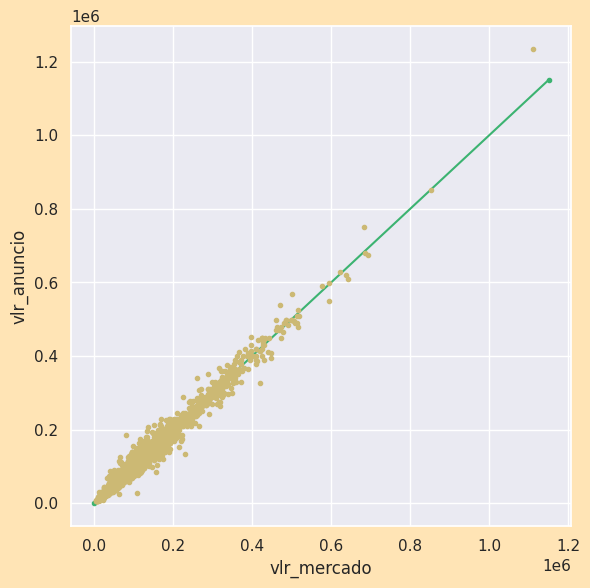

In [23]:
(dataplot(
    df,
    'vlr_mercado',
    'vlr_anuncio',
    add = [
           np.linspace(0, 1150000, 2),
           np.linspace(0, 1150000, 2)    # reta y=x
           ],
    linestyle2='solid'
          )
)

### Ano Inválido
Também vemos que há veículos cujo ano é -1, o que é uma inconsistência. Descartaremos esses dados.

In [24]:
df = df[df['ano_modelo'] > 0]

###Relação entre `views` e `leads` e `cliques_telefone`

Talvez não seja essa a mecânica da plataforma, mas como não podemos consultar um especialista ou desenvolvedor no momento, vamos considerar que para fazer uma proposta (`leads`), seja necessário que primeiro se visualize (`views`) o anúncio.

Também vamos considerar que é impossível clicar em número de telefone em um anúncio (`cliques_telefone`) sem visualizar primeiro o anúncio (`views`).

Se for assim mesmo que a plataforma funciona, então para cada anúncio, necessariamente vamos ter:

- `views` ≥ `leads`
- `views` ≥ `cliques_telefone`

Ou seja, iremos considerar anúncios que possuem mais cliques do que views como dados inconsistentes e iremos descartá-los. Bem como anúncios que possuem mais leads do que views. Vemos abaixo que os dados que estamos removendo, considerados inconsistentes, de fato são poucos e sua remoção não deve afetar a análise.

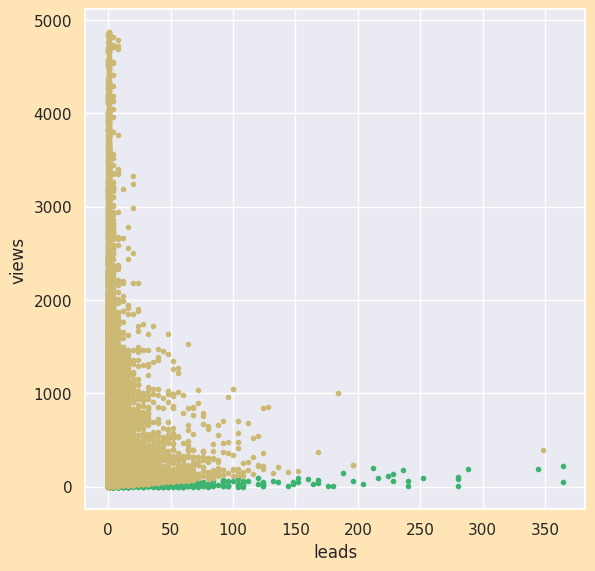

In [25]:
(dataplot(
    df [df['views'] >= df['leads']],
    'leads',
    'views',
    add=[
         df [df['views'] < df['leads']] ['leads'],
         df [df['views'] < df['leads']] ['views']
               ] ))

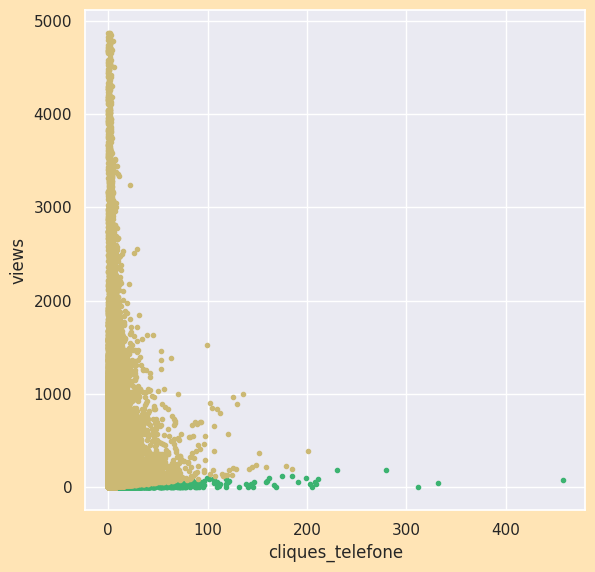

In [26]:
(dataplot(
    df [ df['views'] >= df['cliques_telefone'] ],
    'cliques_telefone',
    'views',
    add=[
         df [ df['views'] < df['cliques_telefone'] ] ['cliques_telefone'],
         df [ df['views'] < df['cliques_telefone'] ] ['views']
               ] ))

In [27]:
df = df[df['cliques_telefone'] <= df['views']]
df = df[df['leads'] <= df['views']]

### Quilometragem

A quilometragem de um carro pode variar muito, de modo que é difícil estimar valores. Para nos auxiliar na avaliação desses dados, faremos uma pequena pesquisa externa. Em uma análise mais elaborada, entretanto, certamente faríamos uma pesquisa mais robusta e procuraríamos entrar em contato com especialistas em vez de apenas nos basear na primeira coisa que aparece nos mecanismos de busca.

"A média de quilometragem que um veículo novo percorre durante um ano é de 15 mil a 20 mil quilômetros"
- fonte: https://www.webmotors.com.br/wm1/dinheiro-e-economia/existe-limite-de-quilometragem-para-carro-usado




 "De acordo com as nossas pesquisas, o brasileiro roda, em média, 12.900 km com seu carro por ano. Porém, esta distância se refere somente ao primeiro ano de vida do modelo. A KBB Brasil identificou que à medida em que o veículo vai ficando "mais velho", sua quilometragem anual diminui numa taxa média de 390 km ao ano. Ou seja, em cinco anos, um carro pode deixar de rodar cerca de 2.000 km.

\[...\]

Cada região do país possui sua própria média de quilometragem no primeiro ano devido às suas características particulares, conforme mostra a tabela a seguir. A diferença entre os estados pode chegar a 6.500 km, considerando a média trafegada pelo pernambucanos (11.100 km) e dos tocantinenses (17.600 km)."
- fonte: https://www.kbb.com.br/detalhes-noticia/quilometragem-precos-carro-usado/?id=1802

Nossa breve pesquisa indica que a média de quilômetros rodados por ano por um veículo é abaixo de 20.000 km. Com base nisso, tentaremos detectar outliers, e iremos eliminar, veículos que rodaram acima de 40.000 km por ano.

Antes de tudo, plotamos abaixo o gráfico de quilômetros por ano de cada veículo:

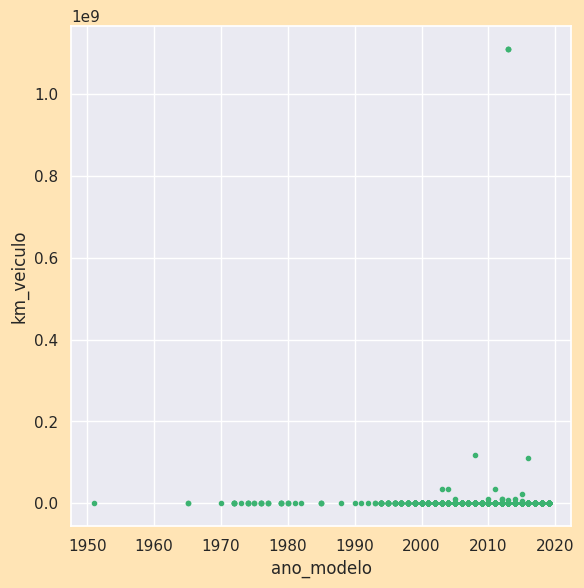

In [28]:
dataplot(df,'ano_modelo', 'km_veiculo')

Podemos ver que há pelo menos um número que parece tão alto em relação ao resto a ponto de não ser crível. Agora, iremos eliminar veículos que rodaram mais do que 40.000km por ano e plotar novamente o gráfico:

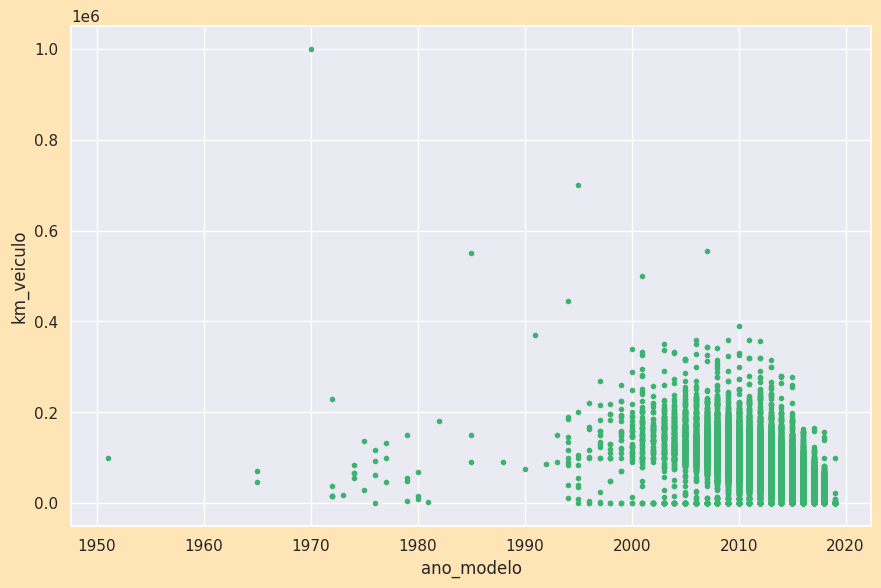

In [36]:
df = df[df['km_veiculo'] <= 40000*(2022 - df['ano_modelo'])]

dataplot(df,'ano_modelo', 'km_veiculo', size=(8,5))

Provavelmente poderíamos ter tomado mais cuidado e ter escolhido métricas melhores para escolher os dados a serem removidos, mas um estudo desse tomaria mais tempo do que o que dispomos.

# Feature Engineering

Agora que já fizemos uma limpeza dos dados, podemos criar algumas variáveis novas para nos ajudar a analisar e modelar o problema.

## Valor Relativo

Sabemos que o valor do anúncio de um carro é importante na hora da compra, e que é comum que um comprador procure saber se um carro está anunciado acima ou abaixo do seu valor de mercado. Desse modo, criamos a variável valor relativo, que é uma representação do valor do anúncio como uma porcentagem do valor de mercado:


In [37]:
df['vlr_relativo'] = df['vlr_anuncio']/df['vlr_mercado']

Em posse desse novo valor, podemos fazer mais uma limpeza: Considerando altamente improvável que algum veículo seja anunciado por um valor maior ou igual ao dobro de seu valor de mercado, checamos se temos dados assim, e quantos:


In [38]:
df_show(df[df['vlr_relativo'] >= 2])

,uf,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica
3886,SP,87500.0,8,87500,40421.06136,0,0,0.0,0.0,0,0.0
24081,RS,69000.0,8,69000,33770.28421,1,0,1.0,0.0,0,0.0
39053,SP,185000.0,8,0,79832.66700,0,0,0.0,0.0,0,0.0


Vemos que são 3 veículos. Um deles é blindado, o que pode justificar seu alto valor relativo, mas os outros dois não, então nos desfazemos deles por parecerem inconsistentes.

In [39]:
df.drop(df[(df['vlr_relativo'] > 2) & (df['vlr_relativo'] < 2.3)].index, inplace=True)


## Desejáveis

Temos diversas colunas em nosso dataframe indicando se há presença de itens como freio ABS, vidros elétricos, ar condicionado. Ao comprar um veículo, um comprador provavelmente irá buscar maximizar a quantidade desses itens que ele poderá ter. Também há outros fatores desejáveis, como garantia de fábrica e IPVA pago, que também são características que agregam valor ao veículo e são desejáveis de maneira geral. Assim, criamos a coluna `desejaveis`, que irá ser a soma dos valores das seguintes colunas:

- `flg_unico_dono`;
- `flg_ipva_pago`;
- `flg_licenciado`;
- `flg_todas_revisoes_concessionaria`;
- `flg_todas_revisoes_agenda_veiculo`;
- `flg_garantia_fabrica`;
- `alarme`;
- `airbag`;
- `arquente`;
- `arcondic`;
- `abs`;
- `desembtras`;
- `travaeletr`;
- `vidroseletr`;
- `rodasliga`;
- `sensorchuva`;
- `sensorestacion`;

Também consideramos desejável que o valor do anúncio esteja abaixo do valor de mercado do veículo (isto é, que valor relativo seja menor do que 1), e levamos isso em conta na hora de construir essa nova feature.

 Evidentemente deixamos de fora algumas colunas por entendermos que um carro ser blindado, aceitar trocar, ser adaptado a PCD, ou possuir banco de couro pode não ser algo desejável a todo e qualquer comprador.  

In [40]:
df['desejaveis'] = ( [int(x < 1) for x in df['vlr_relativo']]  # indica se vlr_anuncio é menor que vlr_mercado
                    + df['flg_unico_dono']
                    + df['flg_ipva_pago']
                    + df['flg_todas_revisoes_concessionaria']
                    + df['flg_todas_revisoes_concessionaria']
                    + df['flg_todas_revisoes_agenda_veiculo']
                    + df['flg_garantia_fabrica']
                    + df['alarme']
                    + df['airbag']
                    + df['arquente']
                    + df['arcondic']
                    + df['abs']
                    + df['desembtras']
                    + df['travaeletr']
                    + df['vidroseletr']
                    + df['rodasliga']
                    + df['sensorchuva']
                    + df['sensorestacion'] )

E agora, podemos olhar uma amostra do nosso dataset:

In [41]:
amostra = df.sample(6)

In [46]:
#Rode esta célula várias vezes
df_show(amostra)

,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro
17505,0.0,0,0,0.0,gasolina e alcool,manual,4.0,1.0,1.0,1.0,0.0
40847,0.0,0,0,0.0,gasolina e alcool,manual,4.0,0.0,0.0,0.0,0.0
11705,0.0,0,0,0.0,gasolina e alcool,manual,4.0,0.0,0.0,0.0,0.0
36756,0.0,0,0,0.0,gasolina e alcool,manual,4.0,1.0,0.0,0.0,0.0
38096,0.0,0,0,0.0,gasolina e alcool,automatico,4.0,1.0,1.0,0.0,0.0
24135,0.0,0,0,0.0,gasolina e alcool,manual,4.0,1.0,1.0,0.0,0.0


# Análise

## Views e Cliques de Telefone

Queremos investigar as relações entre a quantidade de leads e o resto dos dados. Vamos começar exibindo um gráfico da quantidade de leads pela quantidade de visualizações:


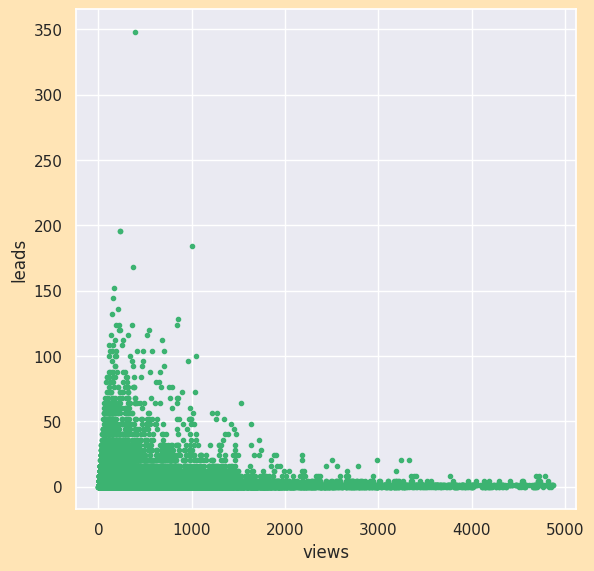

In [47]:
dataplot(df, 'views', 'leads')

Vemos que um número alto de visualizações não garante um número alto de leads. Na verdade, um alto número de views pode até mesmo ser consequência de um baixo número de leads: se o anúncio não desperta atenção de compradores a ponto de sequer receber propostas, ele não será vendido e, portanto, está sujeito a receber cada vez mais visualizações.


O gráfico, entretanto, deixa nítido que mesmo anúncios com muitas visualizações recebem leads.

Já sobre os cliques no telefone do anúncio, o gráfico abaixo parece indicar uma tendência um aumento nos cliques de telefone parecem gerar mais leads.  

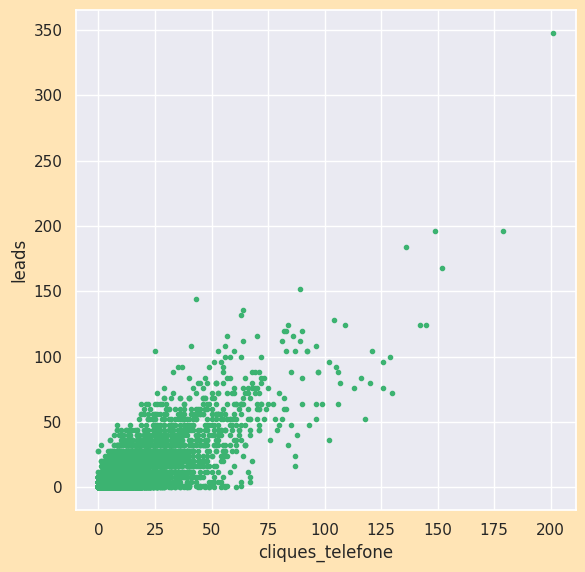

In [48]:
dataplot(df, 'cliques_telefone', 'leads')

## Valor de Anúncio

A quantidade de leads certamente vai ter alguma relação com os valores de anúncio e de mercado de veículo. Podemos então plotar um gráfico de leads por valor de anúncio, ou de leads por valor de mercado, para ver como a quantidade de leads se comporta em relação a esses valores. Como já vimos, os dados `'vlr_mercado'` e `'vlr_anuncio'` são muito próximos e basta plotar um deles para termos uma noção do que acontece.

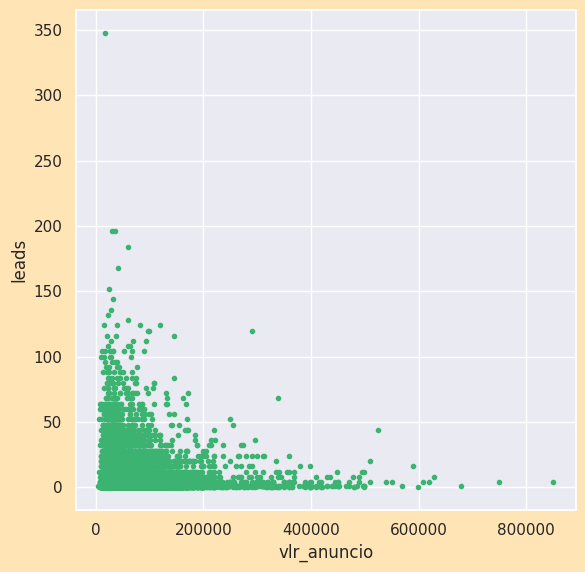

In [49]:
dataplot(df, 'vlr_anuncio', 'leads')

Podemos separar os dados plotados acima em dois grupos. Os dados cujo valor de anúncio é menor que o valor de mercado (`'vlr_relativo'` < 1), e os dados cujo valor de anúncio é maior ou igual o valor de mercado(`'vlr_relativo'` ≥ 1).

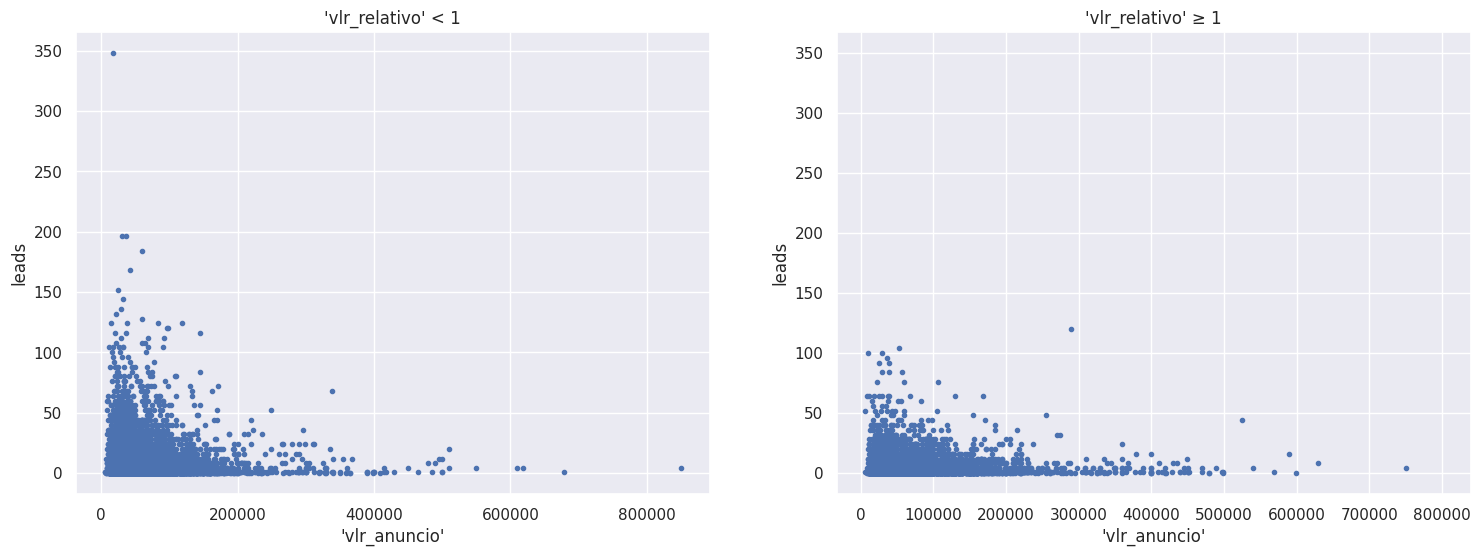

In [52]:
plt.figure(figsize = (18,6))

plt.subplot(1, 2, 1)
plt.plot(df[df['vlr_relativo'] < 1]['vlr_anuncio'],
         df[df['vlr_relativo'] < 1]['leads'],
         marker ='.', linestyle = 'none')
plt.title("'vlr_relativo' < 1")
plt.xlabel("'vlr_anuncio'")
plt.ylabel("leads")

plt.subplot(1, 2, 2)
plt.plot(df[df['vlr_relativo'] >= 1]['vlr_anuncio'],
         df[df['vlr_relativo'] >= 1]['leads'],
         marker ='.', linestyle = 'none')
plt.plot(800000, 350) #gambiarra fácil pra deixar os gráficos em mesma escala
plt.title("'vlr_relativo' ≥ 1")
plt.xlabel("'vlr_anuncio'")
plt.ylabel("leads")

plt.show()

O que vemos acima é um indicativo de que veículos com valor relativo menor do que 1 recebem mais leads do que veículos com valor relativo maior ou igual a 1. As quantidades de leads registradas são claramente superiores para anúncios com valor abaixo de R\\$ 200.000,00. Dos R\\$ 400.000,00 em diante há poucos dados para comparar, mas não parece haver diferença. Possivelmente porque a partir de certo ponto, o valor do anúncio perde a relevância.

Podemos olhar o gráfico de Leads por valor relativo:

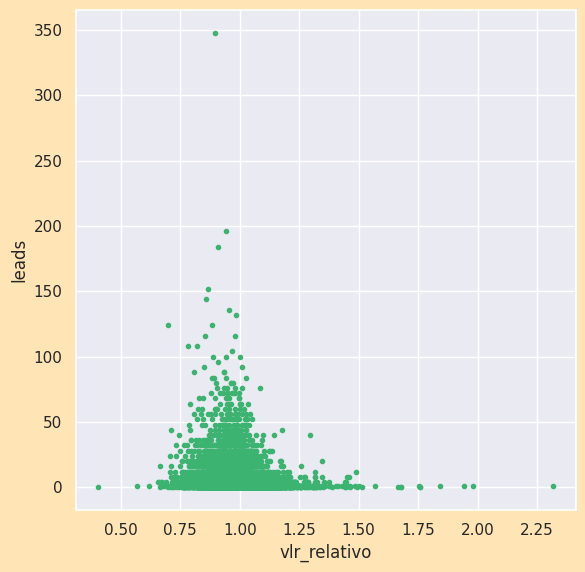

In [53]:
dataplot(df[df['cod_tipo_pessoa'] == 2], 'vlr_relativo', 'leads')

Aqui é fácil perceber que quase todos os anúncios que receberam ao menos 100 leads tem valor relativo menor que 1. E a esmagadora maioria dos anúncios que receberam mais de 50 leads tem valor relativo menor do que 1. Mas também, ao que parece, temos mais veículos anunciados com valor relativo menor que 1. Checamos isso precisamente abaixo:

Quantidade de anúncios com valor relativo maior ou igual a 1:

In [54]:
alto_valor_relativo = len(  df  [df['vlr_relativo'] >= 1] )
alto_valor_relativo

18588

Quantidade de anúncios com valor relativo menor do que 1:

In [55]:
baixo_valor_relativo = len(df[(df['vlr_relativo'] < 1)])
baixo_valor_relativo

20884

In [56]:
20884/18590

1.123399677245831

De fato, há mais anúncios com valor relativo menor do que 1 do que anúncios com valor relativo maior ou igual a 1, mas a diferença não é tanta. O primeiro conjunto é aproximadamente 12% maior que o segundo. Há uma outra informação que chama mais atenção:

In [57]:
pct_alto = len(
          df[
              (df['vlr_relativo'] >= 1) &
              (df['leads'] == 0)
            ]
          )

pct_alto/alto_valor_relativo

0.2396169571766731

In [58]:
pct_baixo = len(
          df[
              (df['vlr_relativo'] < 1) &
              (df['leads'] == 0)
            ]
          )

pct_baixo/baixo_valor_relativo

0.21016088871863628

Embora haja mais dados com valor relativo menor do que 1, uma porcentagem menor desses dados não tem leads (aproximadamente 21%) em comparação aos anúncios com valor relativo maior ou igual a 1, para os quais aproximadamente 24% dos anúncios não possuem leads. A diferença, entretanto, é pequena, mas é um indicativo interessante que certamente vale a pena ser observado em um conjunto de dados maior e em uma análise mais aprofundada.

## Desejáveis

Aqui fazemos uma breve análise da relação da quantidade de leads com a quantidade de itens desejáveis. Começamos colando isso em gráfico:  

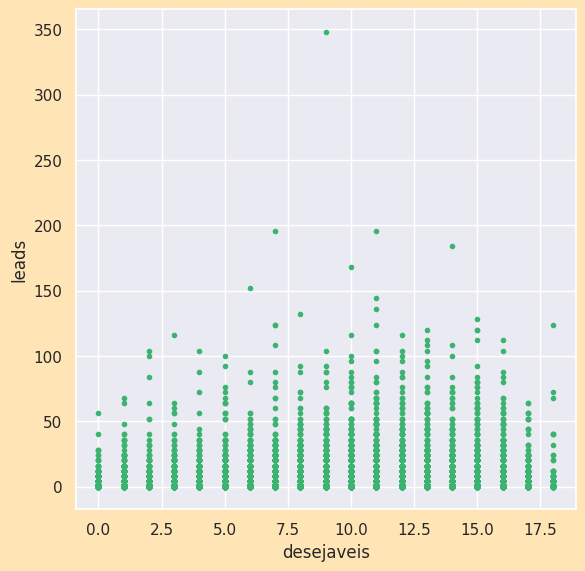

In [59]:
dataplot(df, 'desejaveis', 'leads')

Vê-se que carros que não possuem nenhum dos agregadores de valor definidos na coluna `'desejaveis'` registram as menores quantidades de leads.


# Modelagem

Vamos criar um modelo de Regressão Logística para prever se haverá ou não leads para um determinado anúncio.

## Preparação
Aqui, vamos criar um dataframe novo para trabalharmos em cima dele. Para simplificar o modelo, iremos considerar apenas algumas colunas. Deveríamos, entretanto, em um projeto real, dispor de mais tempo para trabalhar melhor as features a serem usadas, e elaborar features melhores para o modelo.

In [60]:
df_model = df[[
               'vlr_anuncio',
               'vlr_relativo',
               'km_veiculo',
               'ano_modelo',
               'views',
               'qtd_fotos',
               'cliques_telefone',
               'uf',
               'cod_tipo_pessoa',
               'prioridade',
               'cod_marca_veiculo',
               'cod_modelo_veiculo',
               'flg_unico_dono',
               'flg_licenciado',
               'flg_ipva_pago',
               'flg_todas_revisoes_concessionaria',
               'flg_todas_revisoes_agenda_veiculo',
               'flg_garantia_fabrica',
               'flg_blindado',
               'alarme',
               'airbag',
               'arquente',
               'arcondic',
               'abs',
               'desembtras',
               'travaeletr',
               'vidroseletr',
               'rodasliga',
               'sensorchuva',
               'sensorestacion',
               'desejaveis',
               'leads'
]]


Agora, transformamos dados categóricos:

In [61]:
cat_data = ['uf', 'cod_tipo_pessoa', 'cod_marca_veiculo', 'cod_modelo_veiculo']
dummies = pd.get_dummies(df_model[cat_data].astype(str), drop_first=False)


E juntamos ao dataset que será usado:

In [62]:
df_model = pd.concat([df_model, dummies], axis=1)
df_model = df_model.drop(cat_data, axis =1)

## Normalização

Aqui normalizamos os dados. Para isso, simplesmente dividimos os valores das colunas numéricas pelo maior valor presente nestas colunas.

In [63]:
norm = ['vlr_anuncio', 'vlr_relativo', 'km_veiculo', 'ano_modelo', 'views', 'qtd_fotos', 'cliques_telefone', 'prioridade']
for coluna in norm:
  df_model[coluna]= df_model[coluna]/df_model[coluna].max()

## Conjuntos de Treino e Teste

Agora, iremos separar os dados em conjuntos de treino e teste.

In [64]:
y = [int(lead > 0) for lead in df_model['leads']]
y = np.array(y)
x = df_model.drop(['leads'], axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=28)

## Regressão Logística

 Por fim, vamos treinar o modelo em cima do conjunto de treino.

In [ ]:
modelo = LogisticRegression(penalty=None, solver='newton-cg')
modelo.fit(xtrain, ytrain)

Agora, com o modelo treinado, podemos observar a matriz de confusão:

In [ ]:
confusion_matrix(ytest, modelo.predict(xtest))

E também um report de classificação:

In [ ]:
print(classification_report(y, modelo.predict(x)))

O modelo de Regressão Logística pode ser aplicado para resolver o problema que temos aqui, mas precisaria de mais trabalho para ficar realmente bom. Muitos fatores podem influenciar na precisão e na acurácia de um modelo. Para treinar um modelo que realmente funcione, precisaríamos de um pouco mais de tempo.

Seria necessário analisar melhor os dados, levantar mais hipóteses e perguntas durante a fase de Feature Engineering para criar features mais adequadas, testar parâmetros diferentes na hora de treinar o modelo, e selecionar melhor as features que irão para o treino do modelo, possivelmente com alguma técnica de redução de dimensionalidade como PCA ou SVD.